In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data/data_article.csv")

In [6]:
df.sort_values(by="DATE")

,Unnamed: 0,URL,TITRE,IDinDB,TYPE,RESUME,ARTICLE,DATE
1173,1173,https://www.millenaire3.com/ressources/en-pass...,En passant par le centre : la rue de la Républ...,17077,Étude,"Au plus fort des débats sur la ""dégradation"" d...",Sommaire Chapitre I : De la flânerie1. Qui va...,01/01/1990
1253,1253,https://www.millenaire3.com/ressources/la-popu...,La population française d’ici à 2015 : à la re...,34668,Texte,Quelles sont les tendances de la démographie e...,,01/01/1998
1947,1947,https://www.millenaire3.com/ressources/gouvern...,Gouvernements métropolitains et gouvernance da...,21010,Texte,Une première partie est consacrée aux argument...,,01/01/1998
1948,1948,https://www.millenaire3.com/ressources/la-repu...,La République contre la ville : essai sur l’av...,29316,Texte,Article consacré au renouvellement des régulat...,,01/01/1998
1940,1940,https://www.millenaire3.com/ressources/l-etat-...,L’Etat au coeur : le meccano de la gouvernance,52954,Texte,La gouvernance est le défi essentiel du procha...,Titre des chapitres :- De la réforme administr...,01/01/1998
...,...,...,...,...,...,...,...,...
2321,2321,https://www.millenaire3.com/ressources/La-fami...,La « famille associative » du handicap à Lyon ...,18867,Étude,Les associations qui agissent dans le champ du...,Le répertoire d’actions associatif à l’égard d...,31/12/2010
3839,3839,https://www.millenaire3.com/dossiers/VILLE-ET-...,La « famille associative » du handicap à Lyon ...,18867,Étude,Les associations qui agissent dans le champ du...,Le répertoire d’actions associatif à l’égard d...,31/12/2010
3851,3851,https://www.millenaire3.com/dossiers/2011/vill...,La « famille associative » du handicap à Lyon ...,18867,Étude,Les associations qui agissent dans le champ du...,Le répertoire d’actions associatif à l’égard d...,31/12/2010
4141,4141,https://www.millenaire3.com/dossiers/2015/m3-s...,M3 Société urbaine et action publique - N°4,485612,Étude,La revue M3 – société urbaine et action publiq...,Sommaire du n°4 : Grand entretien ■ François...,31/12/2012


In [4]:
df.DATE = pd.to_datetime(df.DATE)
df.DATE = pd.to_datetime(df.DATE, format='%d/%m/%y')

<AxesSubplot:>

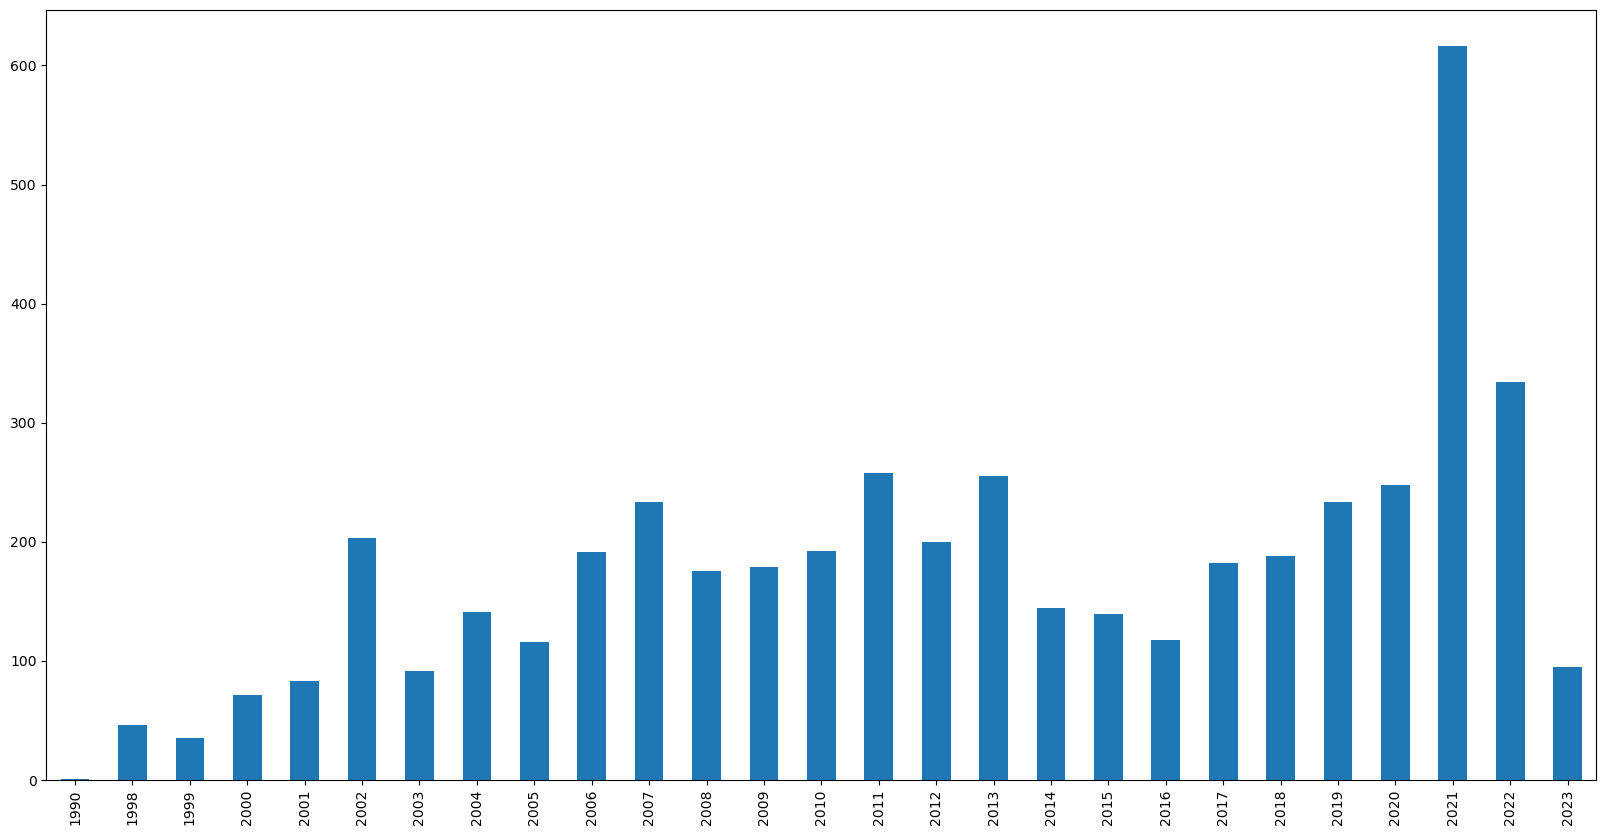

In [11]:
df.DATE.dt.year.value_counts().sort_index().plot(kind = "bar", figsize=(20, 10))

### Analyse items


In [201]:

errors = []
for i in range(df.shape[0]):
    if type(df.loc[i, "RESUME"]) != str and type(df.loc[i, "ARTICLE"]) != str:
        errors.append(df.URL[i])

print(len(errors))
for i, item in enumerate(errors): 
    print(i, item)

1
0 https://www.millenaire3.com/ressources/1-test-ressource


In [202]:
concat = []
for i in range(df.shape[0]):
    texte = ""
    if type(df.loc[i, "RESUME"]) == str:
        texte = df.loc[i, "RESUME"].replace("\n", " ")
    if type(df.loc[i, "ARTICLE"]) == str:
        texte += " "+df.loc[i, "ARTICLE"].replace("\n", " ")
    concat.append(texte)

print(len(df))
print(len(concat))

4766
4766


No NA : (1380, 8)
With NA : (2774, 8)


<AxesSubplot:>

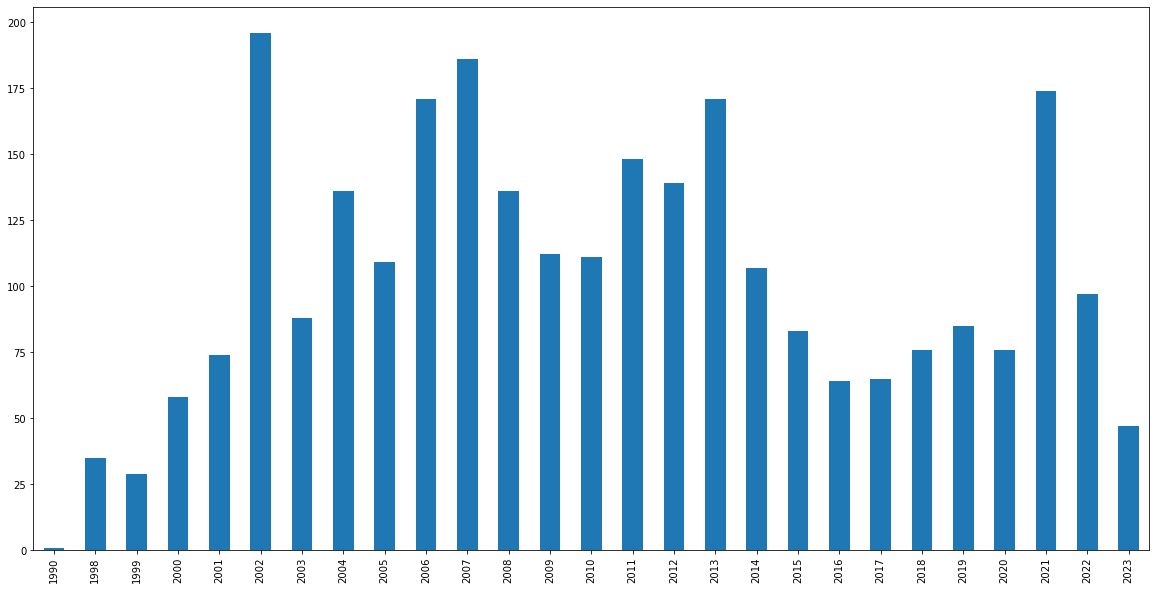

In [5]:
df2 = df.loc[df.TITRE.duplicated() != True,].sort_values(by="IDinDB")
dfnotna = df2.loc[df2.IDinDB.notna()]
print(f"No NA : {dfnotna.shape}\nWith NA : {df2.shape}")
df2["YEAR"] = df2.DATE.dt.year
df2.YEAR.value_counts().sort_index().plot(kind="bar", figsize=(20, 10))

In [204]:
df2.groupby("DATE").count().URL

DATE
1990-01-01     1
1998-01-01    22
1998-02-13     1
1998-02-15     2
1998-03-15     1
              ..
2023-09-03     1
2023-10-03     1
2023-10-28     1
2023-11-05     1
2023-12-01     1
Name: URL, Length: 1458, dtype: int64

<AxesSubplot:title={'center':'Auteurs de M3 avec 10 ou plus publications'}>

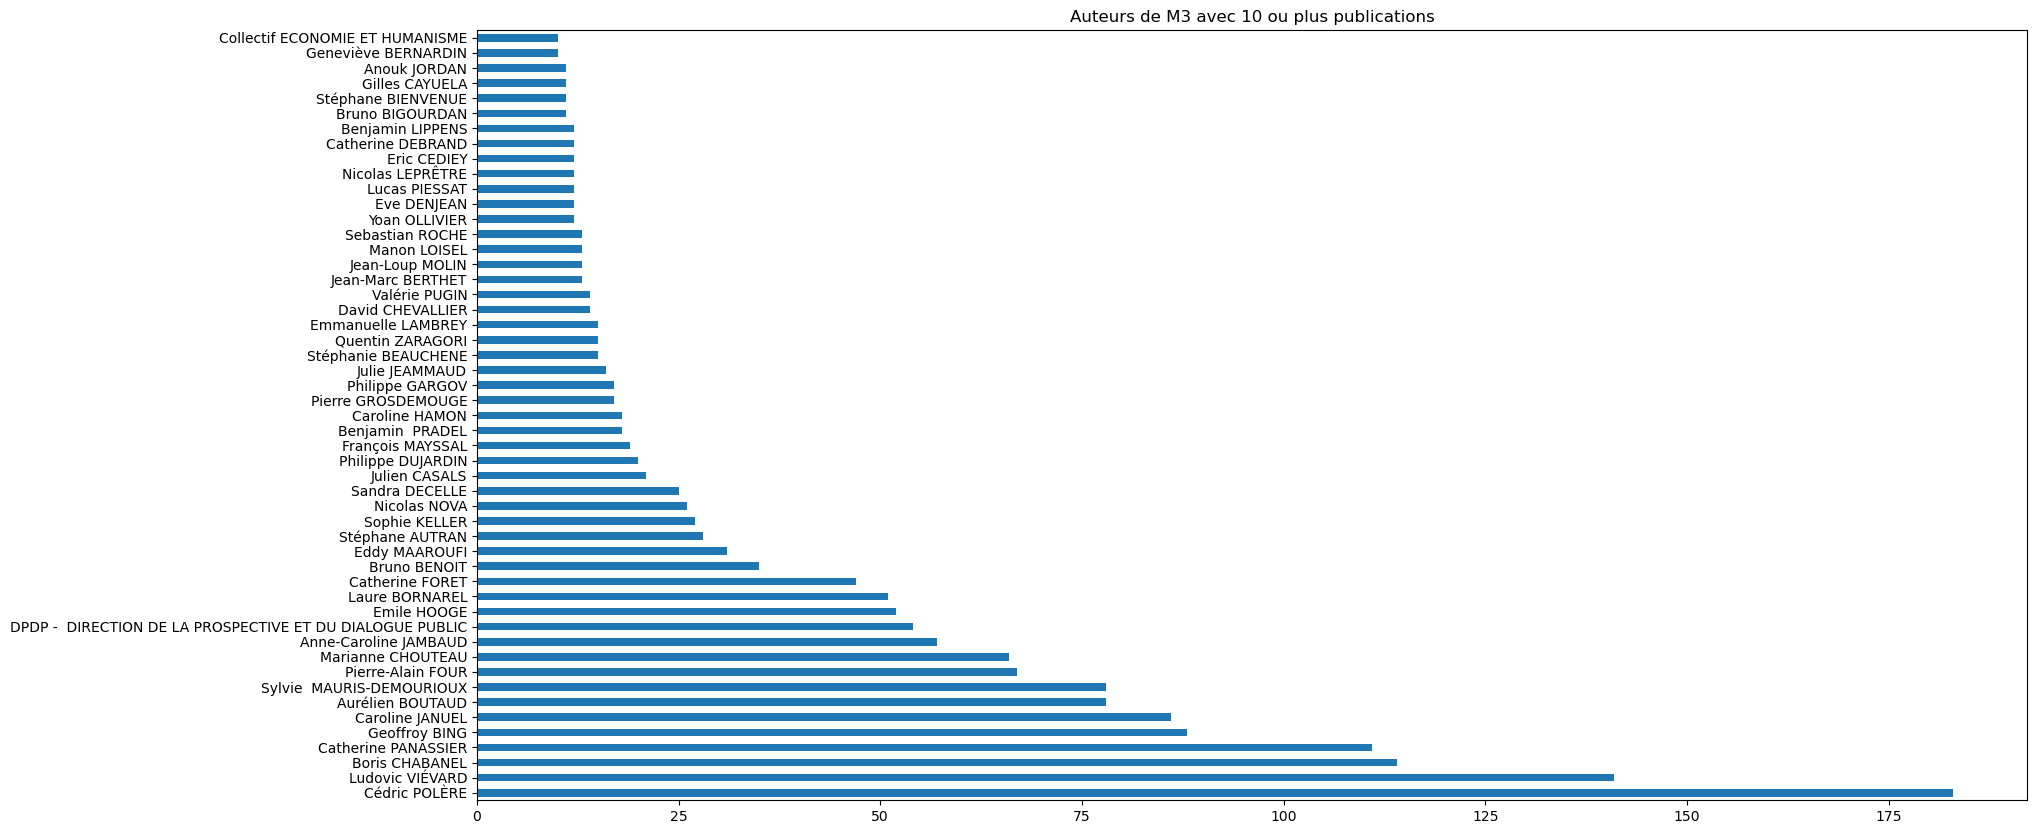

In [29]:
aut = pd.read_csv("./res/auteurs.csv", index_col=0)
tmp = aut.set_index("url").join(df2.set_index("URL")[["YEAR", "DATE"]])
tmp = tmp.loc[tmp.DATE.notna()]
tmp.groupby("auteurs").filter(lambda x:len(x) >= 10).auteurs.value_counts().plot(kind="barh", figsize=(20, 10), title="Auteurs de M3 avec 10 ou plus publications")

<AxesSubplot:ylabel='auteurs'>

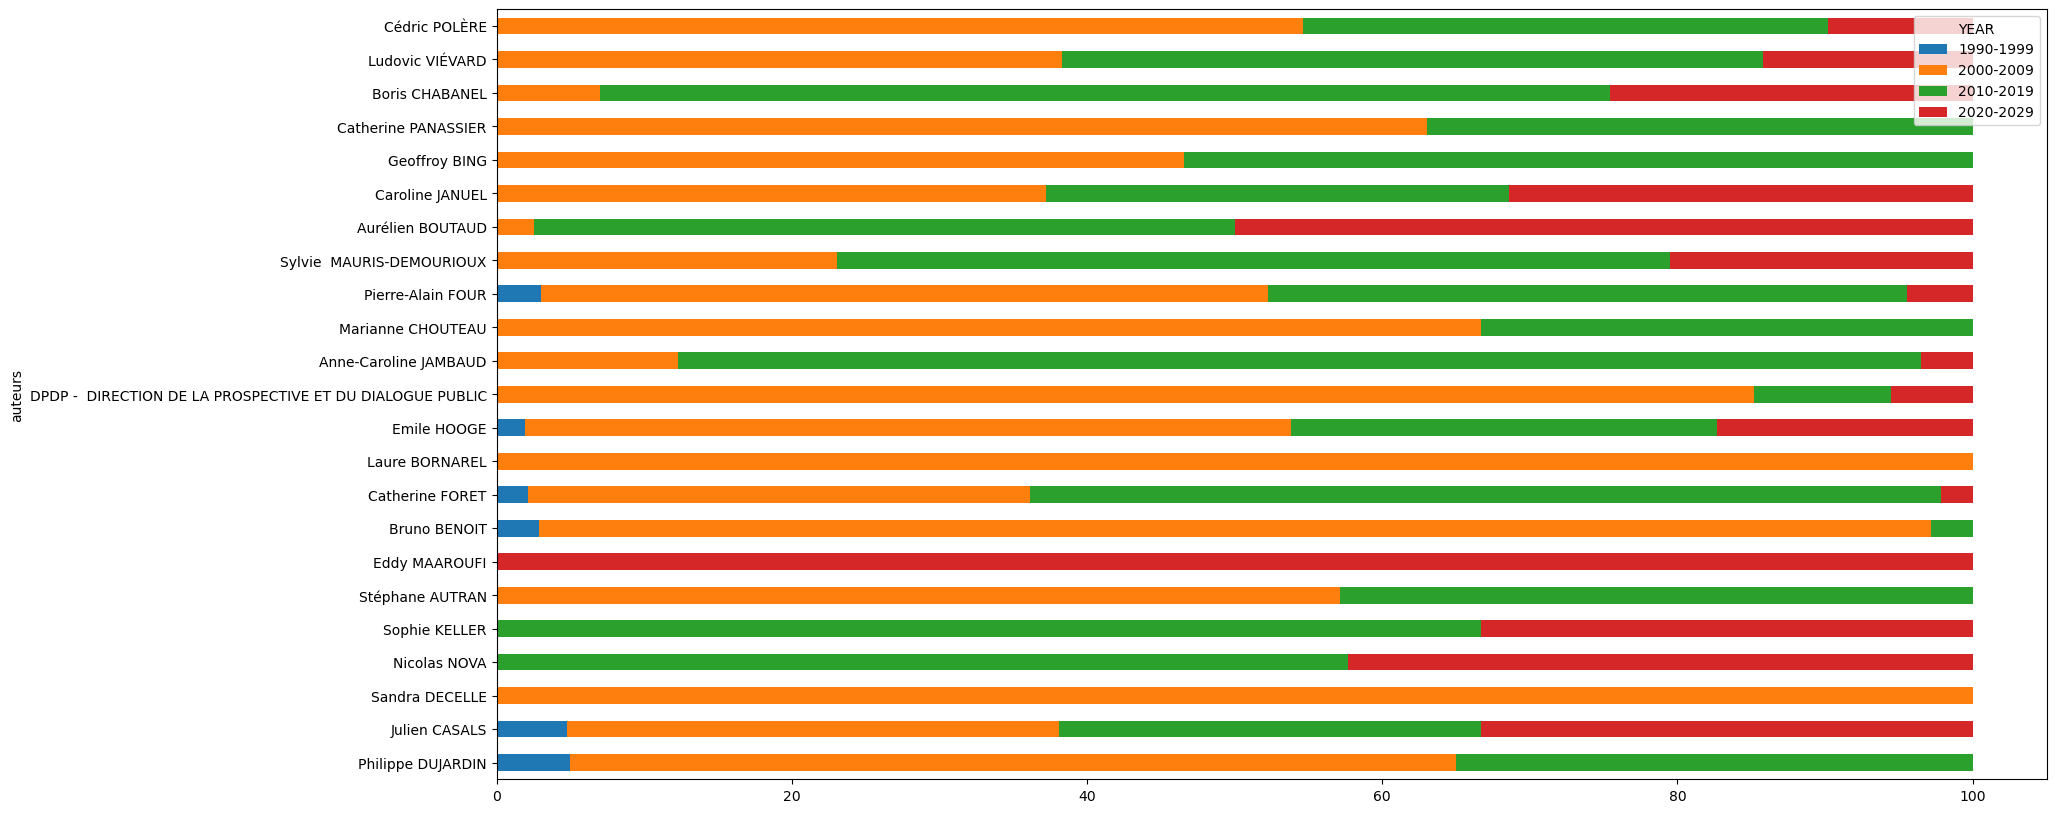

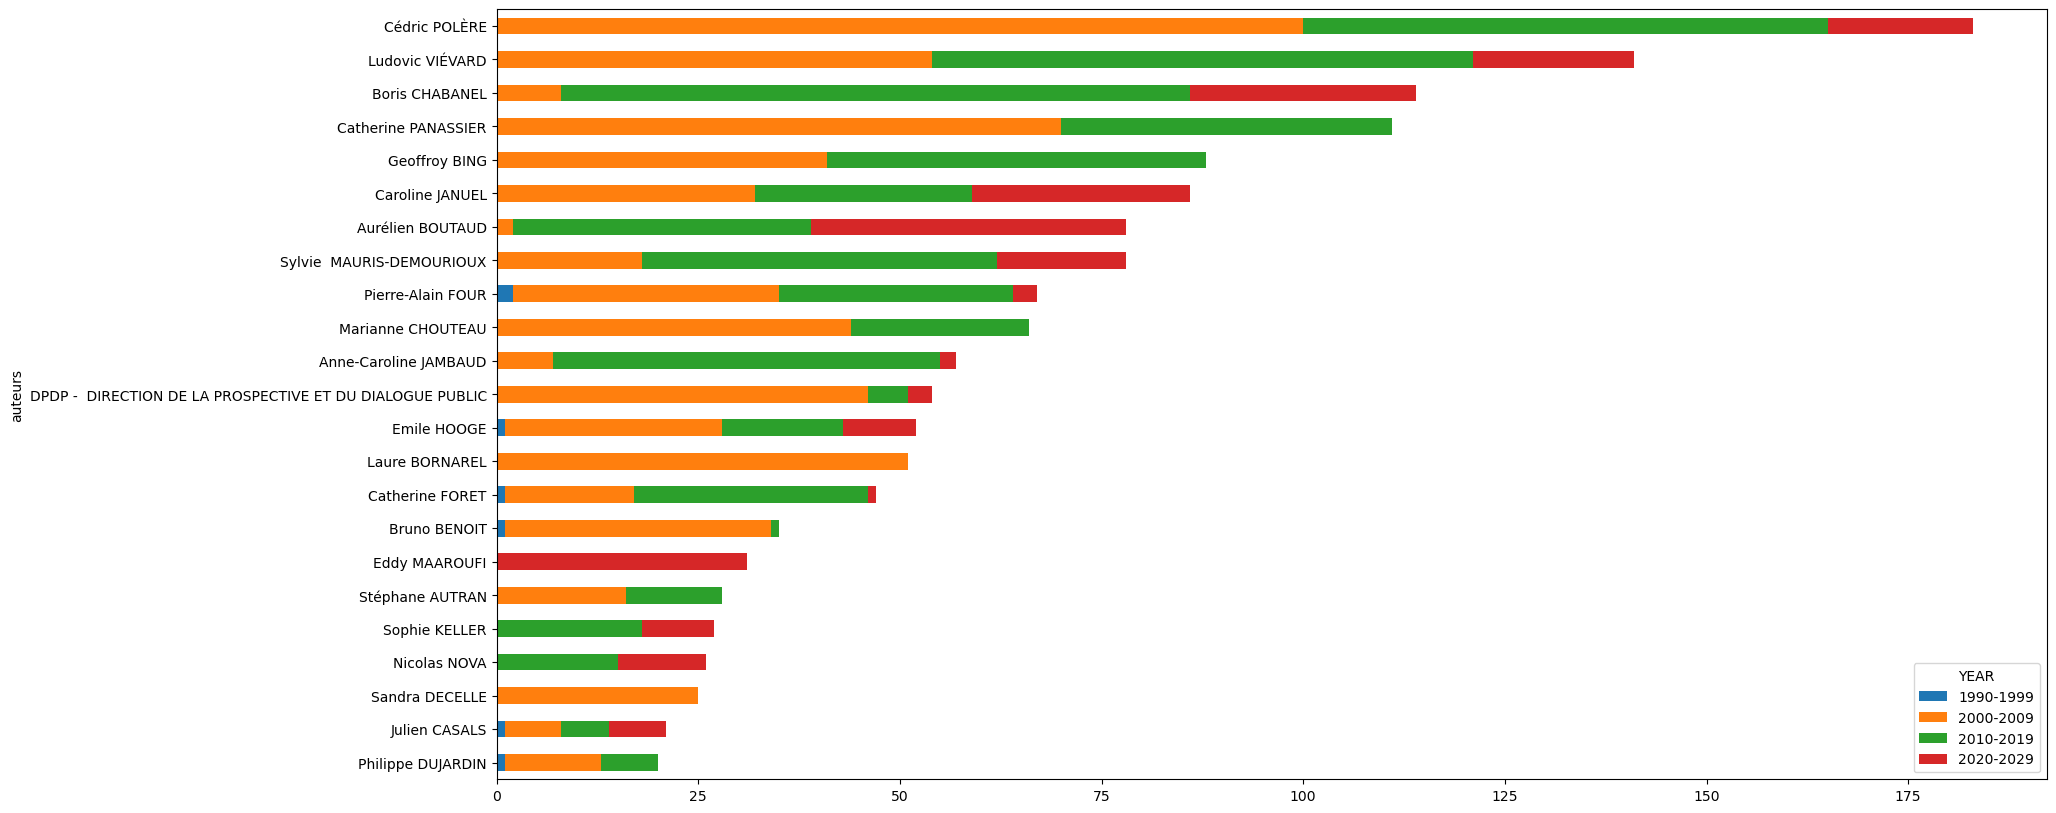

In [95]:
filtered_tmp = tmp.groupby("auteurs").filter(lambda x:len(x) >= 20)
filtered_tmp.YEAR = filtered_tmp.YEAR.replace([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1998, 1999], 
                                         "1990-1999").replace([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009], 
                                                        "2000-2009").replace([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], 
                                                                         "2010-2019").replace([2020, 2021, 2022, 2023, 2024, 2025], "2020-2029")
temp = pd.crosstab(filtered_tmp.auteurs, filtered_tmp.YEAR)
s = temp.sum(axis=1)
temp["tot"] = s
temp.sort_values(by="tot", ascending=True).drop("tot", axis = 1).transpose().transform(lambda x:x/sum(x)).mul(100).transpose().plot(kind = "barh", figsize=(20, 10), stacked=True, colormap = "tab10")
temp.sort_values(by="tot", ascending=True).drop("tot", axis = 1).plot(kind = "barh", figsize=(20, 10), stacked=True, colormap = "tab10")

<AxesSubplot:xlabel='YEAR'>

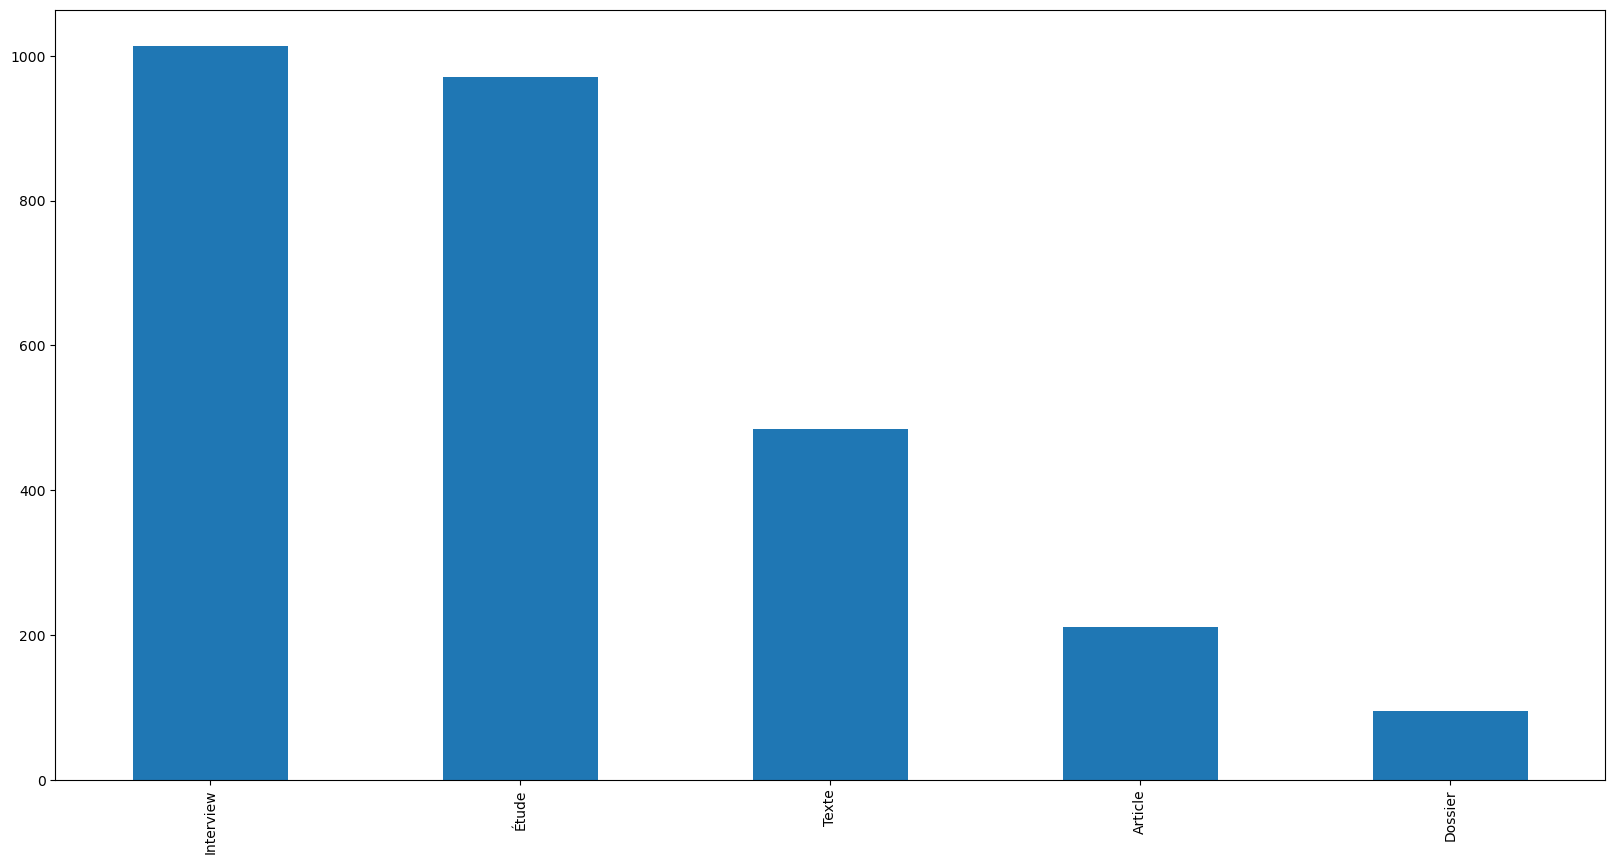

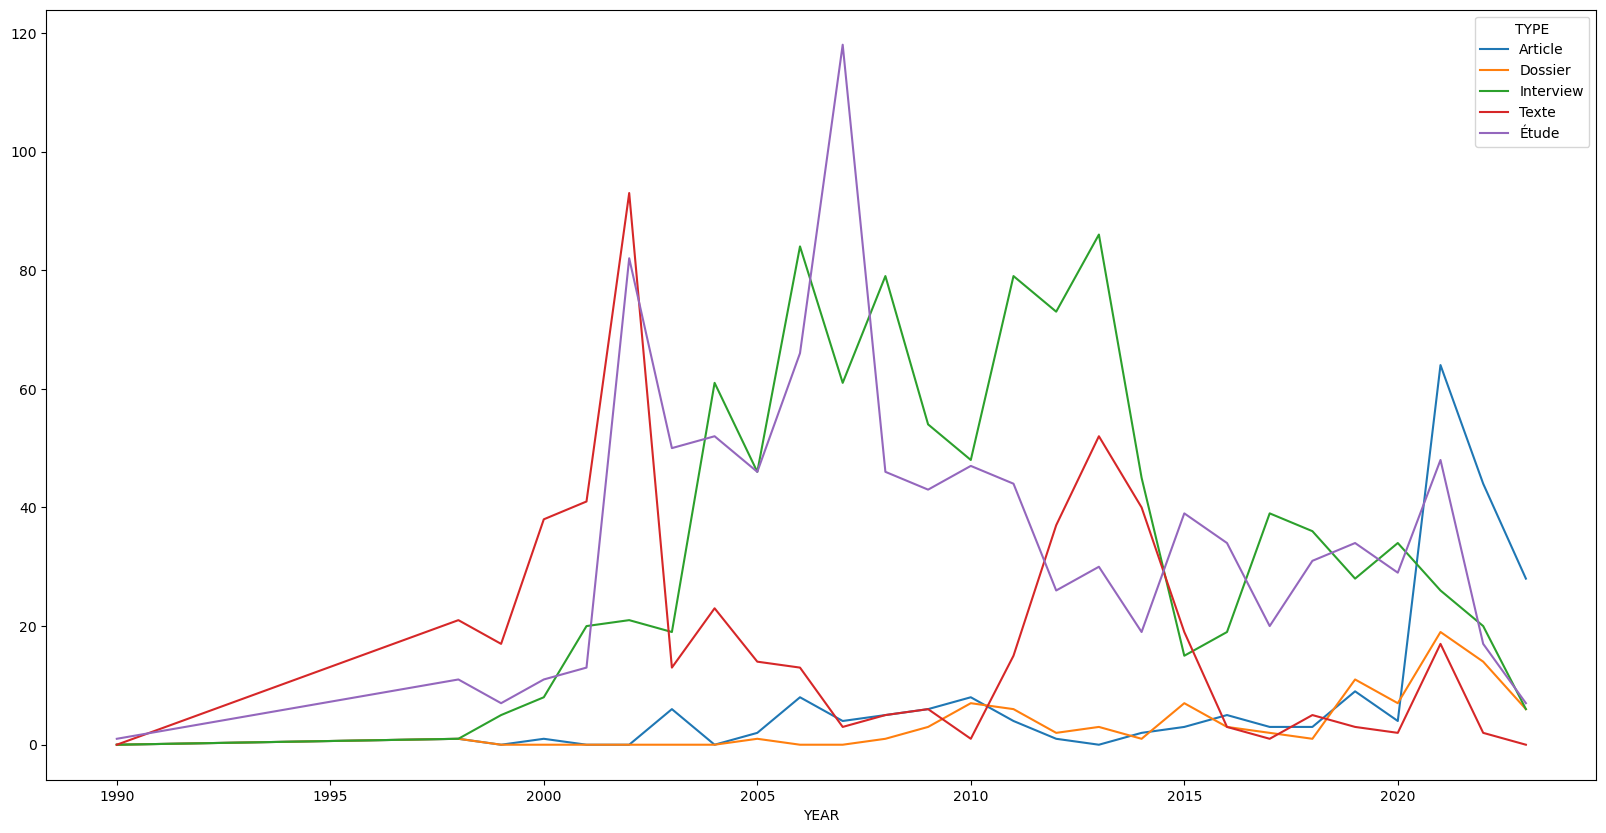

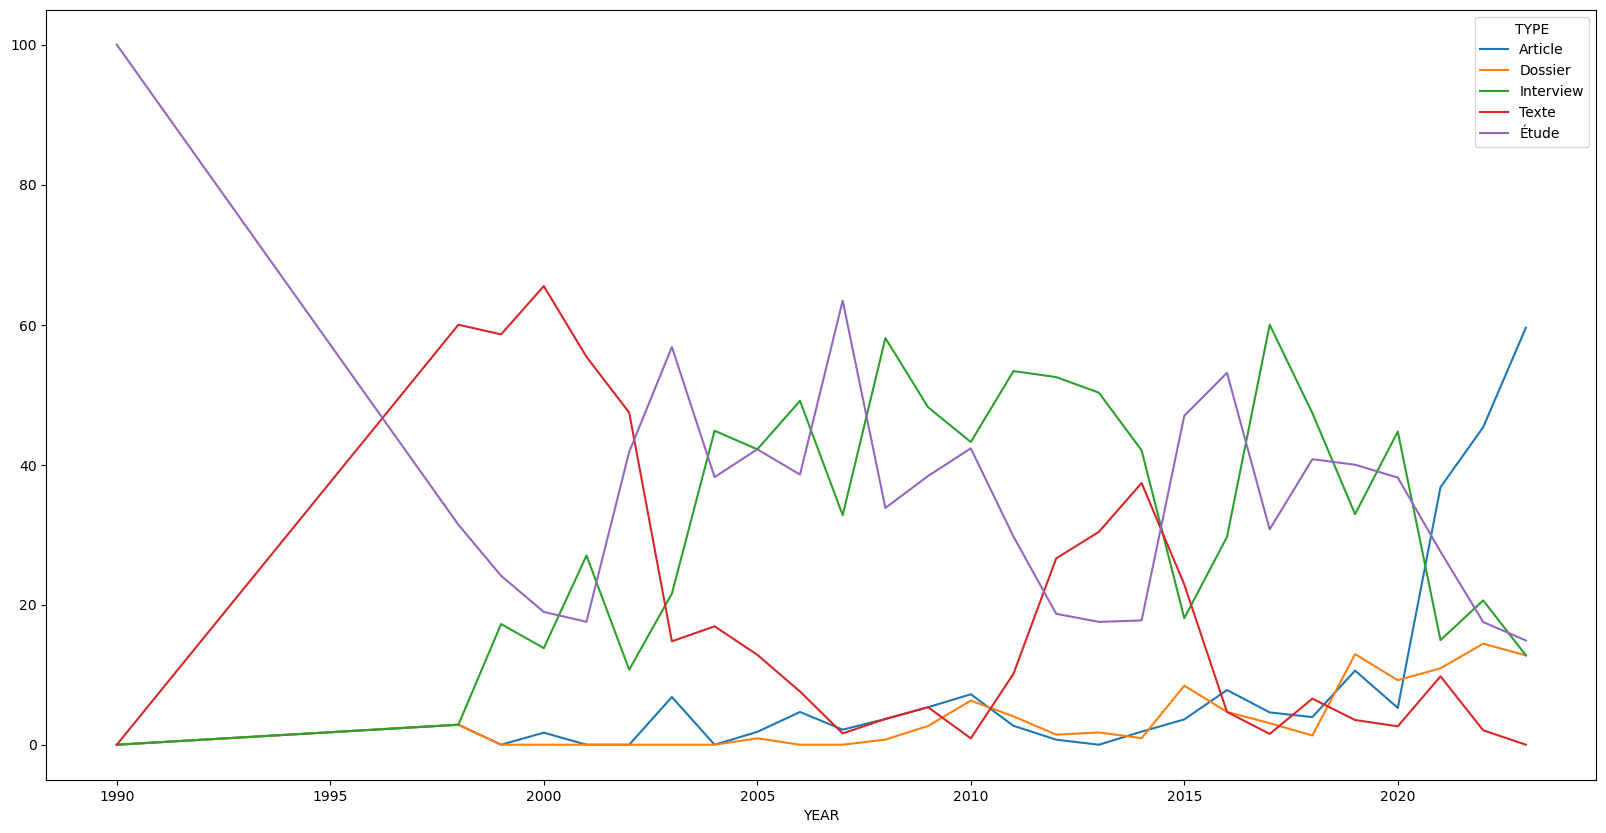

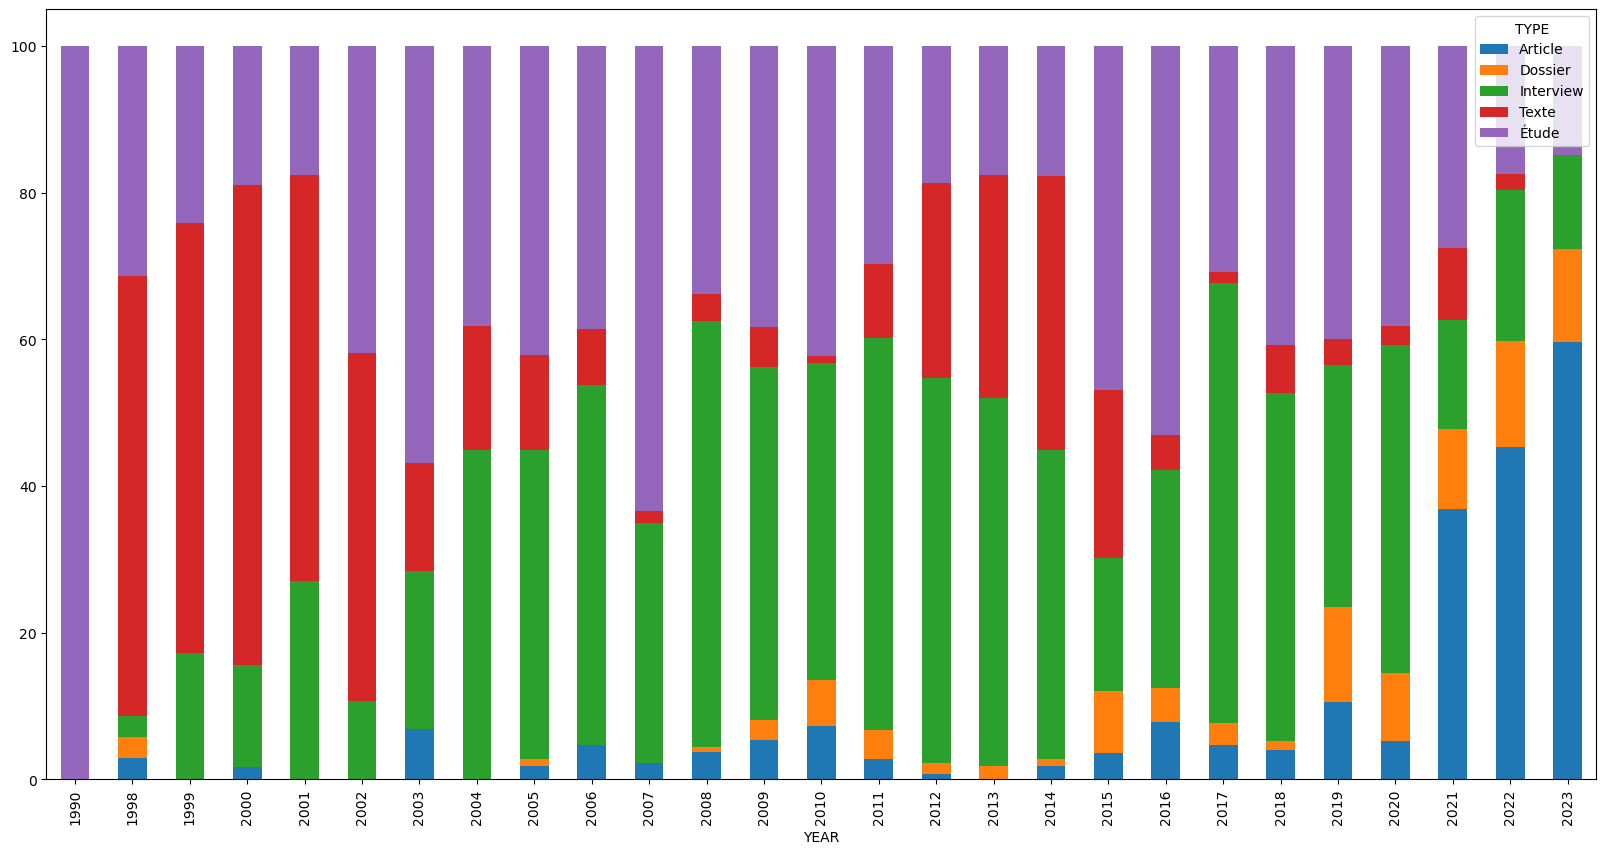

In [120]:
df2.TYPE.value_counts().plot(kind="bar", figsize=(20, 10))

pd.crosstab(df2.YEAR, df2.TYPE).plot(kind="line", figsize=(20, 10))
pd.crosstab(df2.YEAR, df2.TYPE).transpose().transform(lambda x:x/sum(x)).mul(100).transpose().plot(kind="line", figsize=(20, 10), colormap = "tab10")
pd.crosstab(df2.YEAR, df2.TYPE).transpose().transform(lambda x:x/sum(x)).mul(100).transpose().plot(kind="bar", figsize=(20, 10), stacked=True, colormap = "tab10")

In [129]:
tmp = aut.set_index("url").join(df2.set_index("URL")[["YEAR", "TYPE"]])
tmp = tmp.loc[tmp.YEAR.notna()]

<AxesSubplot:xlabel='auteurs'>

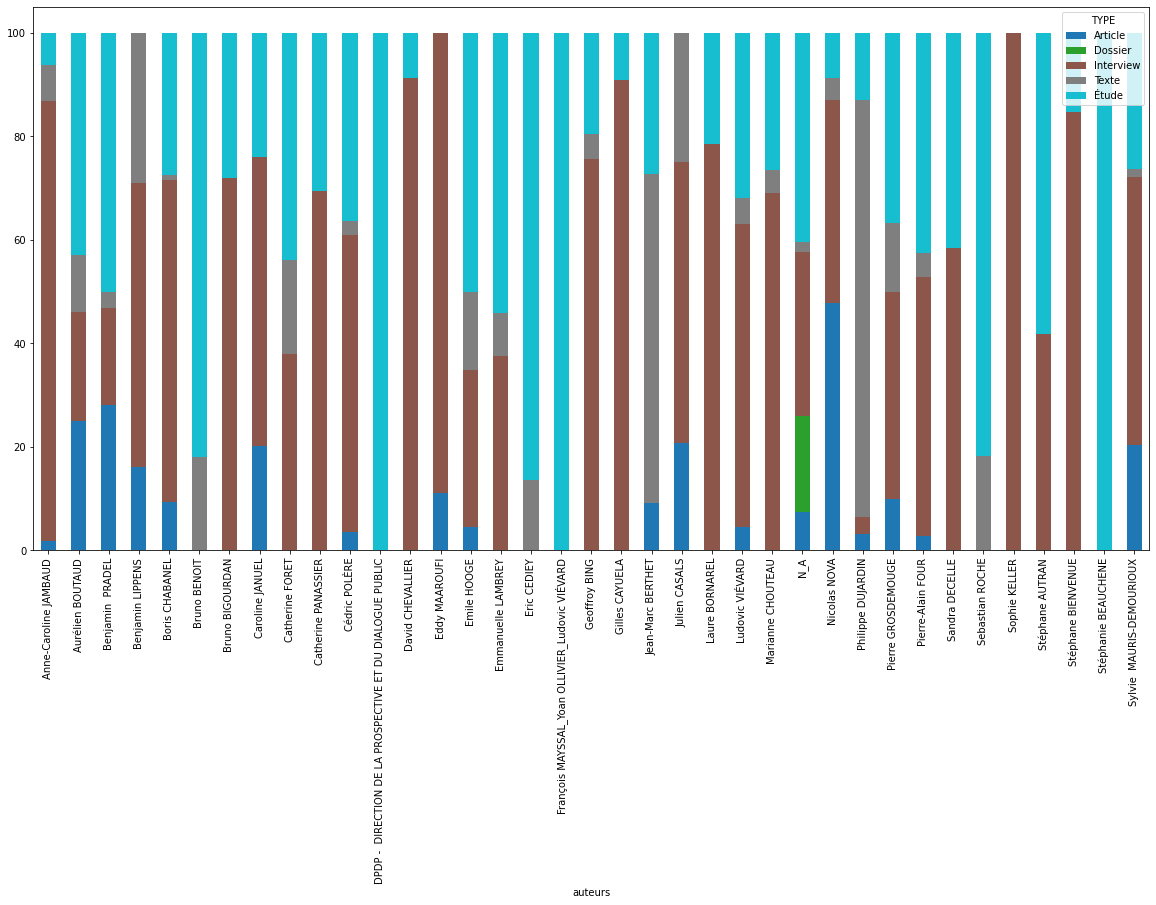

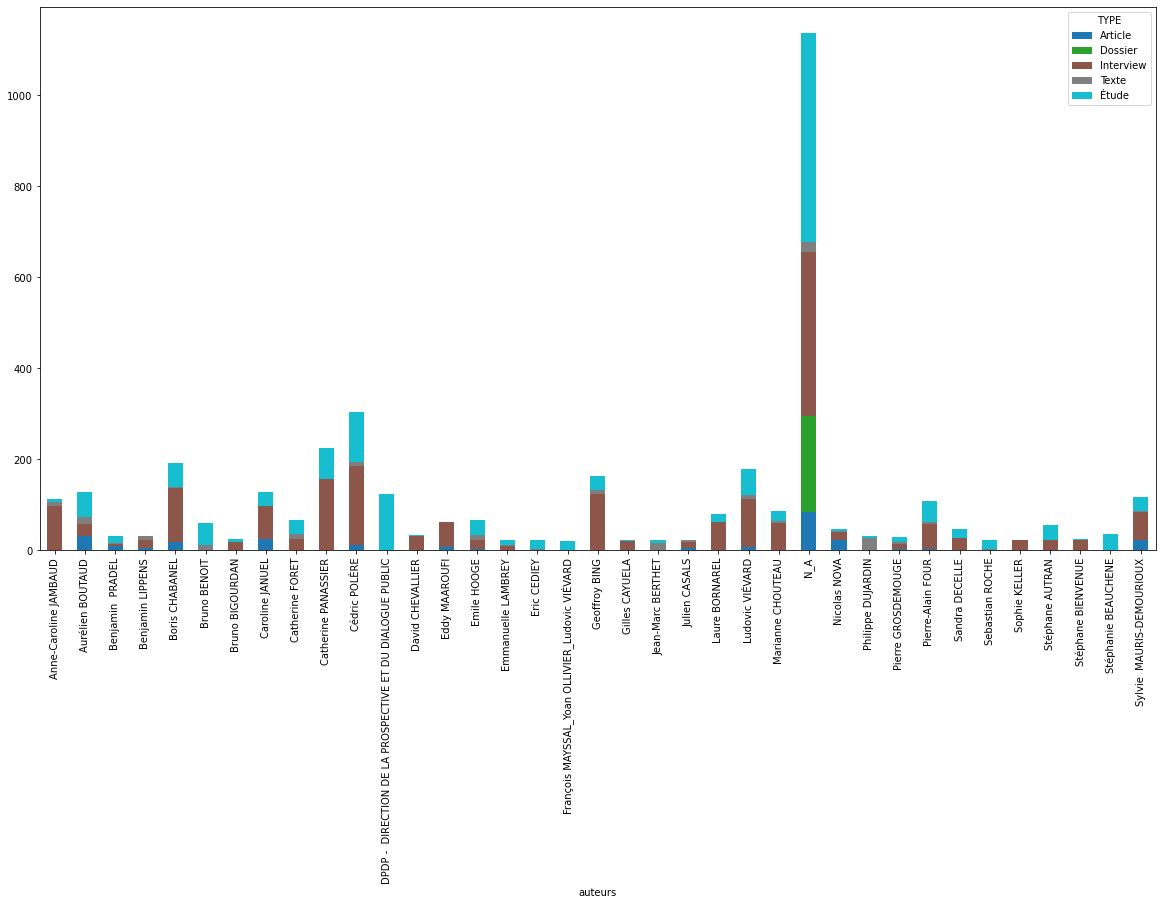

In [78]:
filtered_tmp = tmp.groupby("auteurs").filter(lambda x:len(x) >= 20)
filtered_tmp
temp = pd.crosstab(filtered_tmp.auteurs, filtered_tmp.TYPE)
temp.transpose().transform(lambda x:x/sum(x)).mul(100).transpose().plot(kind="bar", stacked=True, figsize=(20, 10), colormap = "tab10")
temp.plot(kind="bar", stacked=True, figsize=(20, 10), colormap = "tab10")

### TAGS

,tags,auteurs,0,1,2,3,4,5,6,7,8,9,YEAR,DATE
https://www.millenaire3.com/Interview/2000/l-enjeu-du-developpement-des-nouvelles-technologies-dans-les-collectivites,Numérique,N_A,N,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,2000-03-15
https://www.millenaire3.com/Interview/2000/l-enjeu-du-developpement-des-nouvelles-technologies-dans-les-collectivites,Institution,N_A,N,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,2000-03-15
https://www.millenaire3.com/Interview/2000/la-fonction-de-l-occultation-et-de-l-oubli-dans-la-construction-de-toute-memoire-collective,Valeurs,N_A,N,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,2000-04-05
https://www.millenaire3.com/Interview/2000/la-fonction-de-l-occultation-et-de-l-oubli-dans-la-construction-de-toute-memoire-collective,Recherche,N_A,N,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,2000-04-05
https://www.millenaire3.com/Interview/2000/la-maison-du-rhone-un-projet-local-innovant,Innovation,Pierre-Alain FOUR,Pierre-Alain FOUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,2000-02-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.millenaire3.com/ressources/waterscapes-les-paysages-de-l-eau,International,Dieter GRAU_Jessica READ,Dieter GRAU,Jessica READ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,2013-01-06
https://www.millenaire3.com/ressources/yves-chauvin,Transition,Bruno BENOIT,Bruno BENOIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.0,2007-02-01
https://www.millenaire3.com/ressources/yves-chauvin,Patrimoine,Bruno BENOIT,Bruno BENOIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.0,2007-02-01
https://www.millenaire3.com/ressources/zoom-sur-l-education-a-la-sante,Santé,Marianne CHOUTEAU,Marianne CHOUTEAU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,2005-10-25


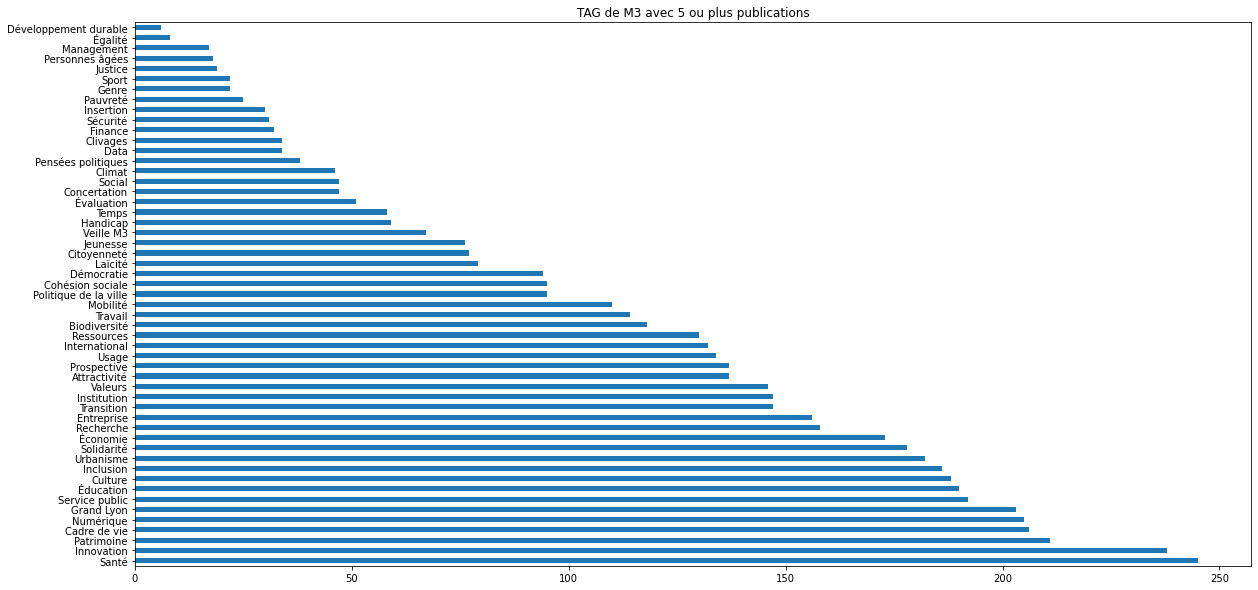

In [16]:
tag = pd.read_csv("./res/tags.csv", index_col=0)
tmp = tag.set_index("url").join(df2.set_index("URL")[["YEAR", "DATE"]])
tmp = tmp.loc[tmp.DATE.notna()]
tmp.groupby("tags").filter(lambda x:len(x) >= 5).tags.value_counts().plot(kind="barh", figsize=(20, 10), title="TAG de M3 avec 5 ou plus publications")

<AxesSubplot:ylabel='tags'>

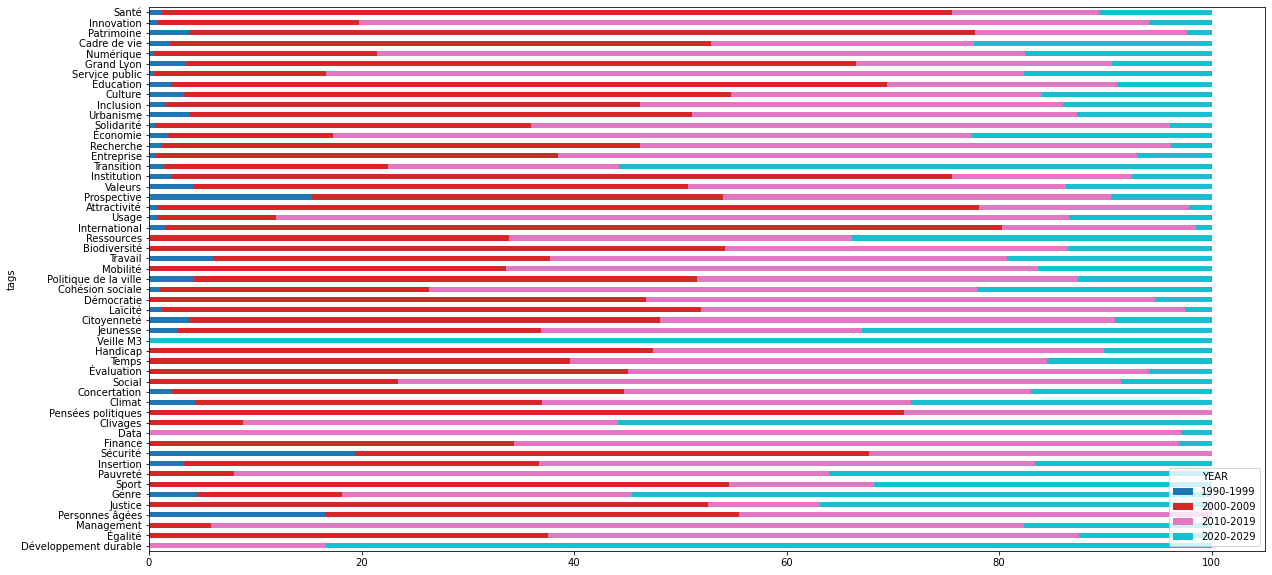

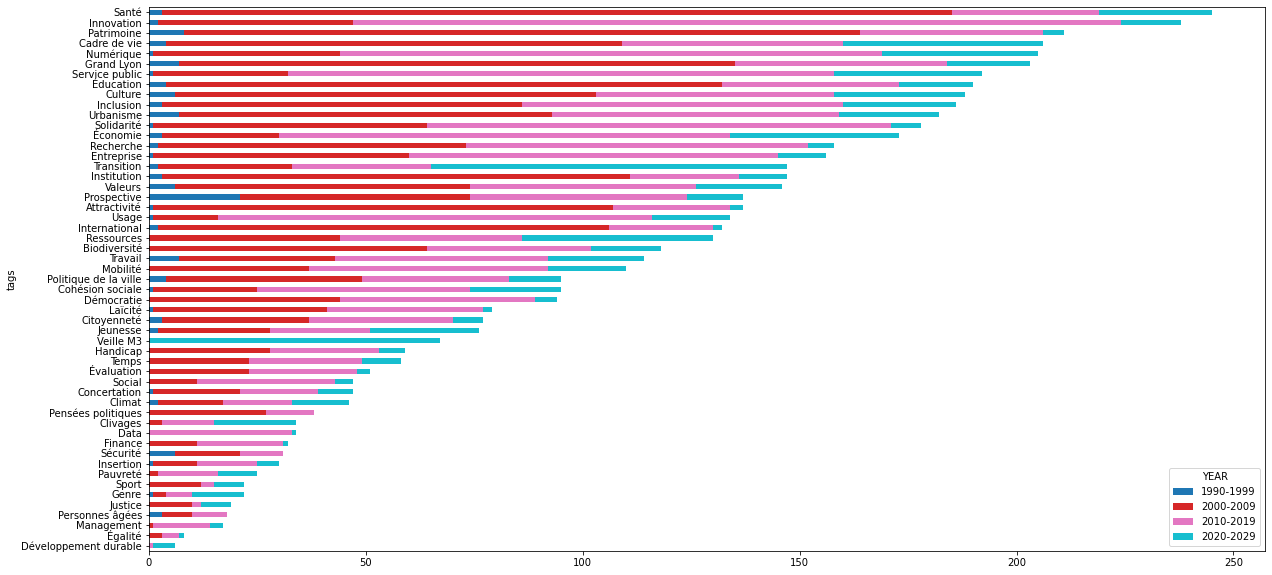

In [112]:
filtered_tmp = tmp.groupby("tags").filter(lambda x:len(x) >= 5)
filtered_tmp.YEAR = filtered_tmp.YEAR.replace([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1998, 1999], 
                                         "1990-1999").replace([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009], 
                                                        "2000-2009").replace([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], 
                                                                         "2010-2019").replace([2020, 2021, 2022, 2023, 2024, 2025], "2020-2029")
temp = pd.crosstab(filtered_tmp.tags, filtered_tmp.YEAR)
s = temp.sum(axis=1)
temp["tot"] = s
temp.sort_values(by="tot", ascending=True).drop("tot", axis = 1).transpose().transform(lambda x:x/sum(x)).mul(100).transpose().plot(kind = "barh", figsize=(20, 10), stacked=True, colormap = "tab10")
temp.sort_values(by="tot", ascending=True).drop("tot", axis = 1).plot(kind = "barh", figsize=(20, 10), stacked=True, colormap = "tab10")


In [119]:
tab = temp.sort_values(by="tot", ascending=True).transform(lambda x:x/sum(x)).mul(100)
tab.round(2).sort_values(by="tot", ascending=False)
#temp.sort_values(by="tot", ascending=False)

YEAR,1990-1999,2000-2009,2010-2019,2020-2029,tot
tags,,,,,
Santé,2.48,7.56,1.53,3.10,4.38
Innovation,1.65,1.87,7.97,1.67,4.26
Patrimoine,6.61,6.48,1.89,0.60,3.77
Cadre de vie,3.31,4.36,2.30,5.48,3.69
Numérique,0.83,1.79,5.63,4.29,3.67
Grand Lyon,5.79,5.32,2.21,2.26,3.63
Service public,0.83,1.29,5.67,4.05,3.43
Éducation,3.31,5.32,1.85,2.02,3.40
Culture,4.96,4.03,2.48,3.57,3.36


In [136]:
a = pd.DataFrame(temp.sum(axis=0).drop("tot").transform(lambda x:x/sum(x)).mul(100)).transpose().round(2)
a.index = ["%"]
a

YEAR,1990-1999,2000-2009,2010-2019,2020-2029
%,2.16,43.06,39.75,15.03


<AxesSubplot:xlabel='tags'>

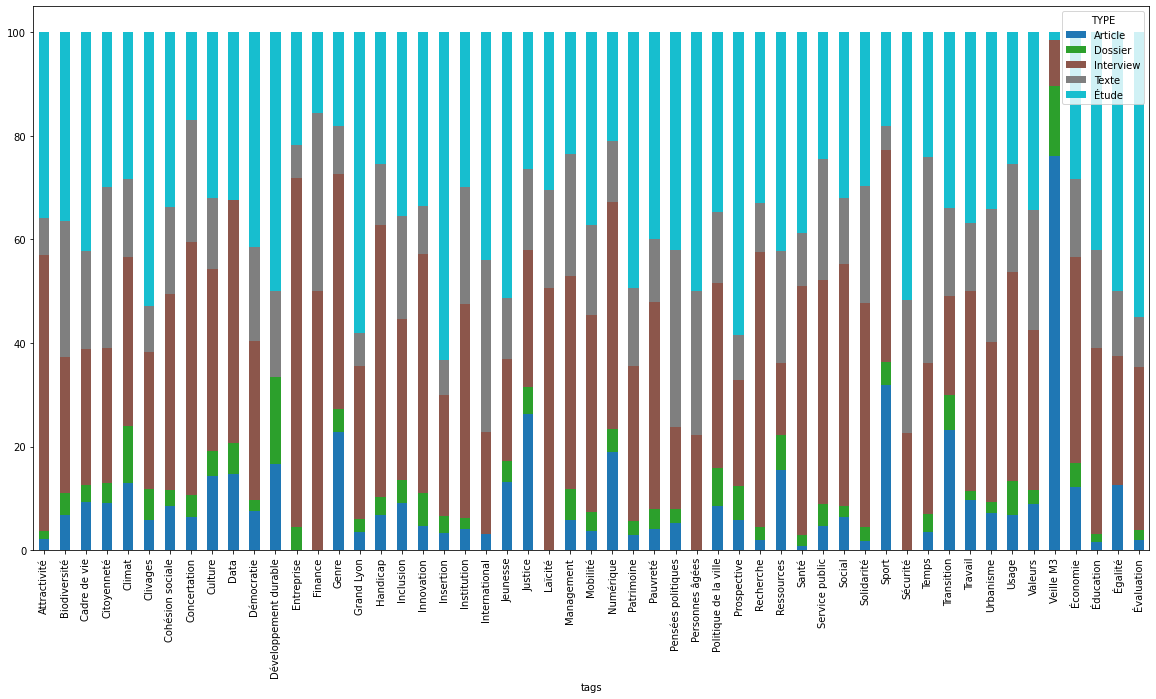

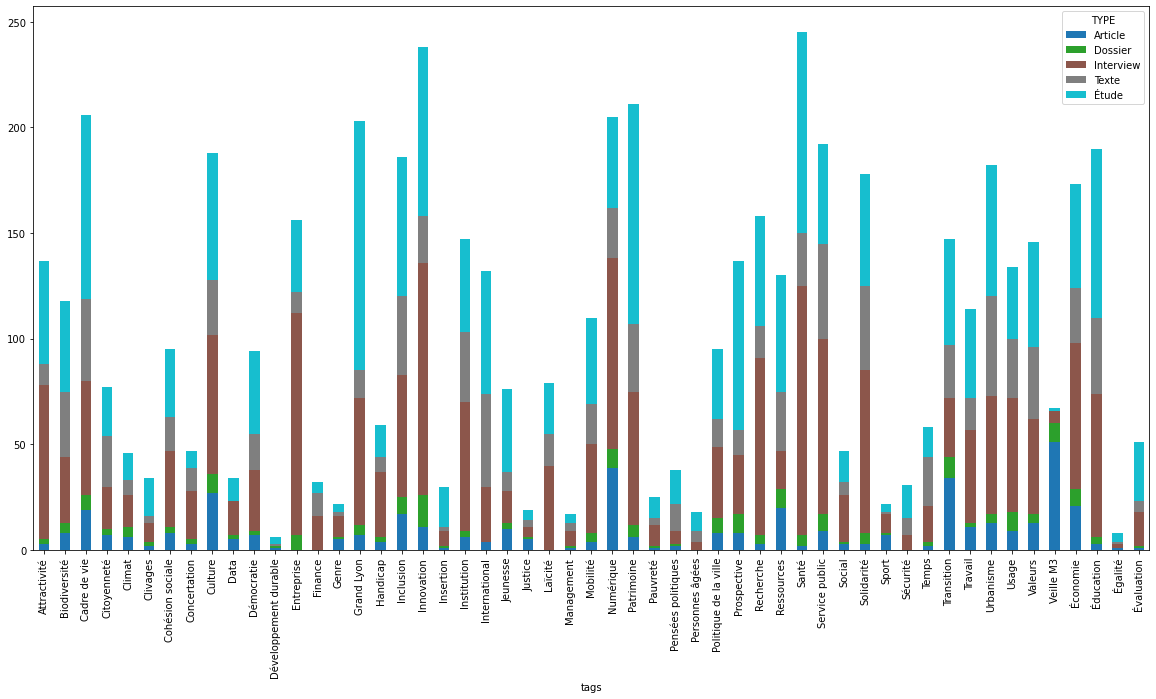

In [137]:
tmp = tag.set_index("url").join(df2.set_index("URL")[["YEAR", "TYPE"]])
tmp = tmp.loc[tmp.YEAR.notna()]
filtered_tmp = tmp.groupby("tags").filter(lambda x:len(x) >= 5)
temp = pd.crosstab(filtered_tmp.tags, filtered_tmp.TYPE)
temp.transpose().transform(lambda x:x/sum(x)).mul(100).transpose().plot(kind="bar", stacked=True, figsize=(20, 10), colormap = "tab10")
temp.plot(kind="bar", stacked=True, figsize=(20, 10), colormap = "tab10")

In [54]:
tab["tot"] = temp.sum(axis=1)
tab = tab.transform(lambda x:x/sum(x)).mul(100).round(2)
tab.sort_values(by="tot", ascending=False)


TYPE,Article,Dossier,Interview,Texte,Étude,tot
tags,,,,,,
Santé,0.45,2.36,5.83,2.70,4.78,4.38
Innovation,2.49,7.08,5.44,2.38,4.02,4.26
Patrimoine,1.36,2.83,3.11,3.46,5.23,3.77
Cadre de vie,4.31,3.30,2.67,4.21,4.38,3.69
Numérique,8.84,4.25,4.45,2.59,2.16,3.67
Grand Lyon,1.59,2.36,2.97,1.40,5.94,3.63
Service public,2.04,3.77,4.10,4.86,2.36,3.43
Éducation,0.68,1.42,3.36,3.89,4.02,3.40
Culture,6.12,4.25,3.26,2.81,3.02,3.36


In [142]:
a = pd.DataFrame(temp.sum(axis=0).transform(lambda x:x/sum(x)).mul(100)).transpose().round(2)
a.index = ["%"]
a

TYPE,Article,Dossier,Interview,Texte,Étude
%,7.89,3.79,36.19,16.57,35.56


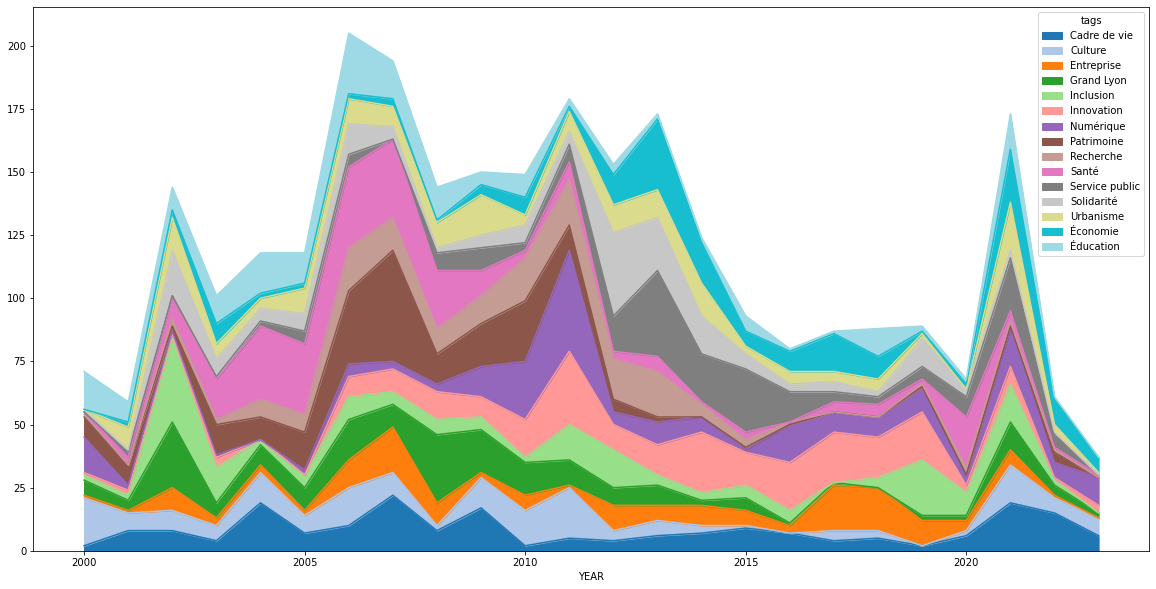

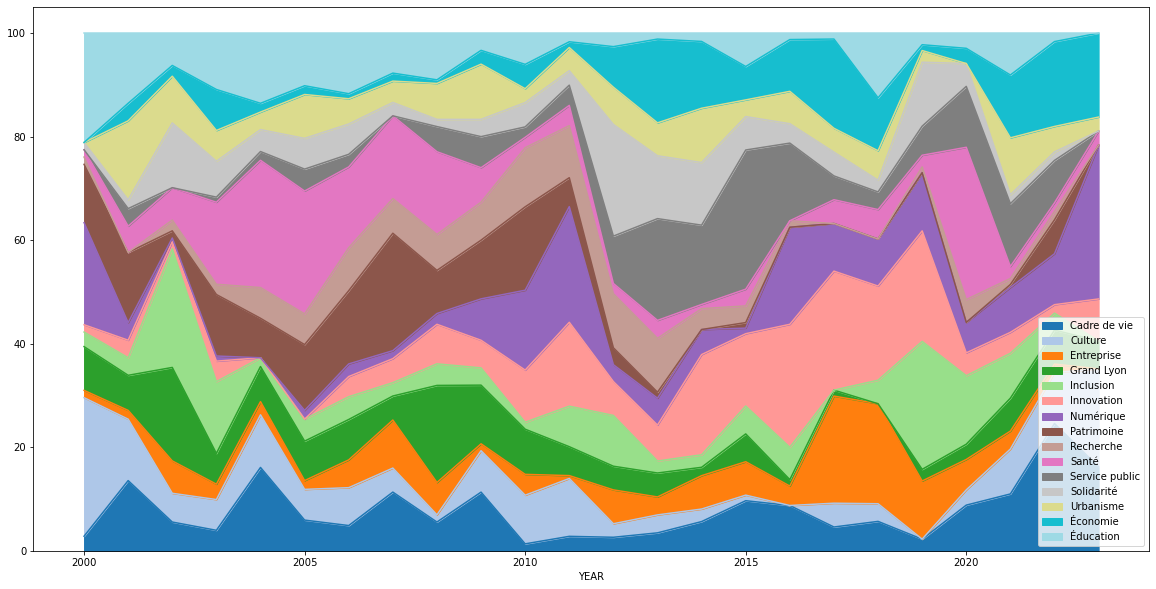

In [111]:
filtered_tmp = tmp.groupby("tags").filter(lambda x:len(x) >= 150)
filtered_tmp = filtered_tmp[filtered_tmp.YEAR >= 2000]
#pd.crosstab(filtered_tmp.YEAR, filtered_tmp.tags).plot(kind="line", figsize=(20, 10))
#pd.crosstab(filtered_tmp.YEAR, filtered_tmp.tags).transform(lambda x:x/sum(x)).mul(100).plot(kind="line", figsize=(20, 10))
pd.crosstab(filtered_tmp.YEAR, filtered_tmp.tags).plot(kind="area", figsize=(20, 10), stacked=True, colormap = "tab20")
pd.crosstab(filtered_tmp.YEAR, filtered_tmp.tags).transpose().transform(lambda x:x/sum(x)).mul(100).transpose().plot(kind="area", figsize=(20, 10), stacked=True, colormap = "tab20").legend(loc='best')